In [2]:
install.packages(c("matrixStats", "Hmisc", "splines", "foreach", "doParallel", "fastcluster", "dynamicTreeCut", "survival")) 
source("http://bioconductor.org/biocLite.R") 
biocLite(c("GO.db", "preprocessCore", "impute")) 

Installing packages into ‘/usr/local/lib/R/3.3/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘splines’ is not available (for R version 3.3.0)”Warning message:
“package ‘splines’ is a base package, and should not be updated”Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.0 (2016-05-03).
Installing package(s) ‘GO.db’, ‘preprocessCore’, ‘impute’
Old packages: 'acepack', 'chron', 'colorspace', 'data.table', 'reshape2',
  'RSQLite', 'stringi', 'stringr', 'cluster', 'codetools', 'foreign',
  'lattice', 'Matrix', 'mgcv', 'nlme', 'survival'


In [3]:
install.packages('WGCNA')

Installing package into ‘/usr/local/lib/R/3.3/site-library’
(as ‘lib’ is unspecified)


In [14]:
#=====================================================================================
#
#  Code chunk 1
#
#=====================================================================================


# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored. 
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir); 
# Load the WGCNA package
library(WGCNA)
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
# Allow multi-threading within WGCNA. This helps speed up certain calculations.
# At present this call is necessary for the code to work.
# Any error here may be ignored but you may want to update WGCNA if you see one.
# Caution: skip this line if you run RStudio or other third-party R environments. 
# See note above.
#enableWGCNAThreads()
# Load the data saved in the first part
lnames = load(file = "FemaleLiver-01-dataInput.RData");
#The variable lnames contains the names of loaded variables.
lnames

[1] "/Users/peter/projects/rexwork/FemaleLiver-Data"

[1] "datExpr"   "datTraits"

pickSoftThreshold: will use block size 3600.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3600 of 3600
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0278  0.345          0.456  747.00  762.0000 1210.0
2      2   0.1260 -0.597          0.843  254.00  251.0000  574.0
3      3   0.3400 -1.030          0.972  111.00  102.0000  324.0
4      4   0.5060 -1.420          0.973   56.50   47.2000  202.0
5      5   0.6810 -1.720          0.940   32.20   25.1000  134.0
6      6   0.9020 -1.500          0.962   19.90   14.5000   94.8
7      7   0.9210 -1.670          0.917   13.20    8.6800   84.1
8      8   0.9040 -1.720          0.876    9.25    5.3900   76.3
9      9   0.8590 -1.700          0.836    6.80    3.5600   70.5
10    10   0.8330 -1.660          0.831    5.19    2.3800   65.8
11    12   0.8530 -1.480          0.911    3.33    1.1500   58.1
12    14   0.8760 -1.380          0.949    2.35    0.5740   51.9


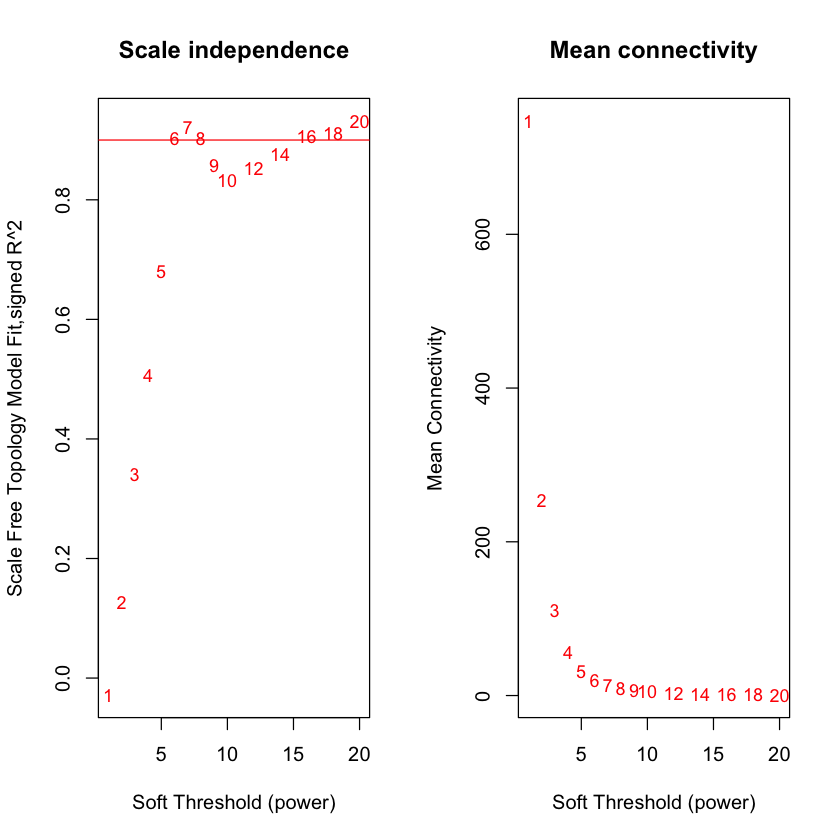

In [15]:



#=====================================================================================
#
#  Code chunk 2
#
#=====================================================================================


# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
# sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
Cluster size 3600 broken into 2133 1467 
Cluster size 2133 broken into 1221 912 
Done cluster 1221 
Done cluster 912 
Done cluster 2133 
Done cluster 1467 
 ..Working on block 1 .
    TOM calculation: adjacency..
adjacency: replaceMissing: 0
    ..will not use multithreading.
     Fraction of slow calculations: 0.396405
    ..connectivity..
    ..matrix multiplication..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file femaleMouseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking modules for statistical meaningfulness..
     ..removing 1 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 7 because their KME is too low.
     ..removing 1 genes from module 8 because their KME is too low.
     ..removing 1 genes from module 21 because their KM

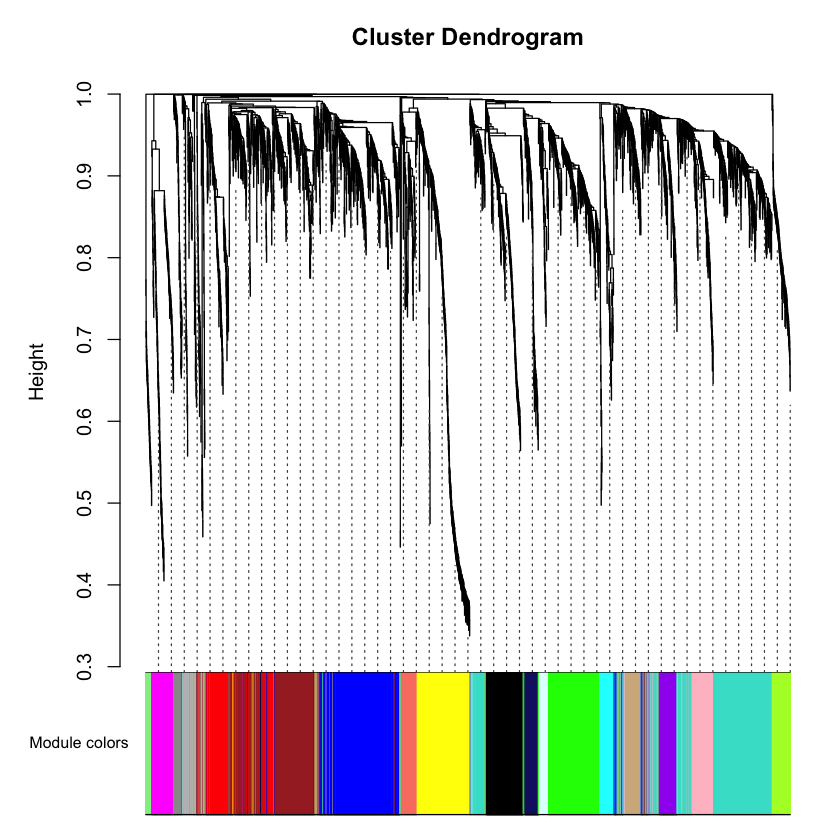

In [16]:



#=====================================================================================
#
#  Code chunk 3
#
#=====================================================================================


net = blockwiseModules(datExpr, power = 6,
                       TOMType = "unsigned", minModuleSize = 30,
                       reassignThreshold = 0, mergeCutHeight = 0.25,
                       numericLabels = TRUE, pamRespectsDendro = FALSE,
                       saveTOMs = TRUE,
                       saveTOMFileBase = "femaleMouseTOM", 
                       verbose = 3)


#=====================================================================================
#
#  Code chunk 4
#
#=====================================================================================


# open a graphics window
#sizeGrWindow(12, 9)
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
                    "Module colors",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)


#=====================================================================================
#
#  Code chunk 5
#
#=====================================================================================


moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs;
geneTree = net$dendrograms[[1]];
save(MEs, moduleLabels, moduleColors, geneTree, 
     file = "FemaleLiver-02-networkConstruction-auto.RData")


In [17]:
# Recalculate topological overlap if needed
TOM = TOMsimilarityFromExpr(datExpr, power = 6);
# Read in the annotation file
annot = read.csv(file = "GeneAnnotation.csv");
# Select modules
modules = c("brown", "red");
# Select module probes
probes = names(datExpr)
inModule = is.finite(match(moduleColors, modules));
modProbes = probes[inModule];
modGenes = annot$gene_symbol[match(modProbes, annot$substanceBXH)];
# Select the corresponding Topological Overlap
modTOM = TOM[inModule, inModule];
dimnames(modTOM) = list(modProbes, modProbes)
# Export the network into edge and node list files Cytoscape can read
cyt = exportNetworkToCytoscape(modTOM,
  edgeFile = paste("CytoscapeInput-edges-", paste(modules, collapse="-"), ".txt", sep=""),
  nodeFile = paste("CytoscapeInput-nodes-", paste(modules, collapse="-"), ".txt", sep=""),
  weighted = TRUE,
  threshold = 0.02,
  nodeNames = modProbes,
  altNodeNames = modGenes,
  nodeAttr = moduleColors[inModule]);


TOM calculation: adjacency..
adjacency: replaceMissing: 0
..will not use multithreading.
 Fraction of slow calculations: 0.396405
..connectivity..
..matrix multiplication..
..normalization..
..done.
